In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.metrics import r2_score

degrees = list(np.arange(1,9,1))  #don't change : 

In [22]:
# #Defining data points

time = np.arange(0,10,0.1)
data = np.sin(time)

"""Scale_map defines the dimensions of bounding boxes"""
scale_map = [i for i in np.arange(1,30,1)]

scale_map = [1,2,3]
# # x = [0,0]
# # y = [1,1]

# # math.dist(x,y)

In [181]:
# A list of box dimensions , will be later changed to (n_dim)**1/n


"""used for xi = (x1)"""
def count_function(combined_arr,r1):
    
    distances = []
    count_list = []
    
    for element in combined_arr:
        distance = [((next_element<(element+r1)) ) for next_element in combined_arr]
        distances.append(distance)
        

    count_list = np.sum(distances,axis=1)
    
    
    return count_list

"""used for xi = (x1,x2)"""
def count_function_2dx(combined_arr,r1):
    
    distances = []
    count_list = []
    
    for element in combined_arr:
        distance = [((next_element[0]<(element[0]+r1)) & (next_element[1]<element[1]+r1) ) for next_element in combined_arr]
        distances.append(distance)
        

    count_list = np.sum(distances,axis=1)
    
    
    return count_list


"""used for xi = (x1,x2,x3)"""
def count_function_3dx(combined_arr,r1):
    
    distances = []
    count_list = []
    
    for element in combined_arr:
        distance = [((next_element[0]<(element[0]+r1)) & (next_element[1]<element[1]+r1) & (next_element[2]<element[2]+r1)) for next_element in combined_arr]
        distances.append(distance)
        

    count_list = np.sum(distances,axis=1)
    
    
    return count_list

"""used for xi = (x1,x2,x3,x4,x5)"""
def count_function_5dx(combined_arr,r1):
    
    distances = []
    count_list = []
    
    for element in combined_arr:
        distance = [((next_element[0]<(element[0]+r1)) & (next_element[1]<element[1]+r1) & (next_element[2]<element[2]+r1) & (next_element[3]<element[3]+r1) & (next_element[4]<element[4]+r1)) for next_element in combined_arr]
        distances.append(distance)
        

    count_list = np.sum(distances,axis=1)
    
    
    return count_list


def average_array_maker(scale_map,combined_df,dimension_x=1):
    final_list = []

    for j in scale_map:
        if dimension_x == 1:
            counts = count_function(combined_df,j)
        
        if dimension_x == 2:
            counts = count_function_2dx(combined_df,j)
            
        if dimension_x == 3:
            counts = count_function_3dx(combined_df,j)
            
        if dimension_x == 5:
            counts = count_function_5dx(combined_df,j)
            
        final_list.append(counts)

    box_counts = pd.DataFrame((np.array(final_list)).T)
    average_array = np.mean(box_counts,axis = 0)
    
    return average_array

''' Updated average array maker that returns count_list too'''
def updated_count_maker(scale_map,combined_df,dimension_x=1):
    final_list = []

    for j in scale_map:
        if dimension_x == 1:
            counts = count_function(combined_df,j)
        
        if dimension_x == 2:
            counts = count_function_2dx(combined_df,j)
            
        if dimension_x == 3:
            counts = count_function_3dx(combined_df,j)
            
        if dimension_x == 5:
            counts = count_function_5dx(combined_df,j)
            
        final_list.append(counts)

    box_counts = pd.DataFrame((np.array(final_list)).T)
    average_array = np.mean(box_counts,axis = 0)
    
    return np.transpose(final_list)


""" Function to fit curves of multiple degrees"""

def polyfit(x, y, degrees):
    results = {}
    
    fig, ax = plt.subplots(2, 4, figsize=(12,12))
    
    for index,degree in enumerate(degrees):
    
        coeffs = np.polyfit(x, y, degree)
        p = np.poly1d(coeffs)
        
        #calculate r-squared
        yhat = p(x)
        ybar = np.sum(y)/len(y)
        ssreg = np.sum((yhat-ybar)**2)
        sstot = np.sum((y - ybar)**2)
        results['r_squared'] = ssreg / sstot
        
        score = r2_score(y, p(x))
        

        polyline = np.linspace(1,8,20)

        if index < 4:
            plot_x = 0
            plot_y = index
        else:
            plot_x = 1
            plot_y = index-4
        
        
        ax[plot_x,plot_y].scatter(x,y)
#         ax[plot_x,plot_y].plot(polyline,p(polyline))
        ax[plot_x,plot_y].plot(x,p(x))
#         ax[plot_x,plot_y].set_xlabel('Degree {}, RSquare: {}'.format(degree, round(results['r_squared'],7) ))
        ax[plot_x,plot_y].set_xlabel('Degree {}, RSquare: {}'.format(degree, round(score,7) ))

    
    fig.show()

    return results



# Swiss role curve

In [135]:
length_phi = 15
length_z = 15
sigma = 0.1
m = 2000

phi = length_phi*np.random.rand(m)
xi = np.random.rand(m)
Z = length_z*np.random.rand(m)
X = 1./6*(phi + sigma*xi)*np.sin(phi)
Y = 1./6*(phi + sigma*xi)*np.cos(phi)

swiss_roll = np.array([X, Y, Z]).transpose()


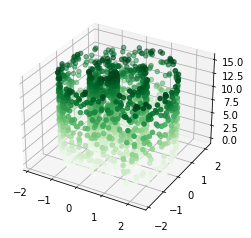

In [136]:
ax = plt.axes(projection='3d')
ax.scatter3D(X,Y,Z,c=Z, cmap='Greens')


0      644.6910
1      860.6555
2     1050.0050
3     1203.8765
4     1309.9825
5     1390.1365
6     1451.9920
7     1503.4060
8     1548.8525
9     1592.0005
10    1632.6415
11    1672.0765
12    1709.4735
13    1743.6165
14    1775.7415
15    1805.4550
16    1832.8825
17    1858.5435
dtype: float64

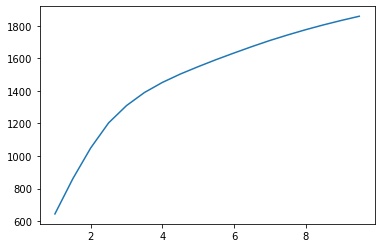

In [137]:
average_array = average_array_maker(scale_map,swiss_roll,dimension_x = 3)
plt.plot(scale_map,average_array)
average_array
# k = count_function(scale_map,swiss_roll)
# np.shape(k)

## Thought : I might not be  doing it correct here, cant change it to single dimension, i am loosing the dimensionality

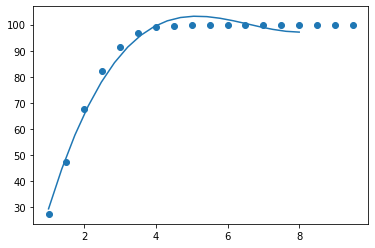

In [101]:
x_values = scale_map
y_values = list(average_array)

model = np.poly1d(np.polyfit(x_values,y_values,3))
polyline = np.linspace(1,8,20)
plt.scatter(x_values,y_values)
plt.plot(polyline,model(polyline))
plt.show()

/var/folders/qr/fds_zg7j76g51mq0zmqdqfnc0000gn/T/ipykernel_31368/837534098.py:94: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'r_squared': 0.9999921654235026}

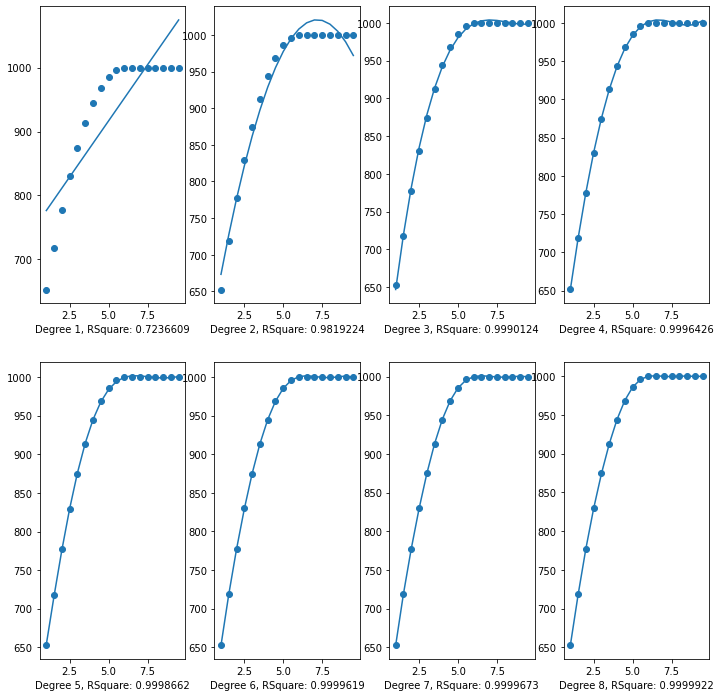

In [140]:
polyfit(x_values,y_values,degrees)


## Questions : 
1) Why does the dimension boxes need to be a square ? Can it be a circle ==> As it will result in a single comparision to eucledian distance formula ?

## Gaussian Curve

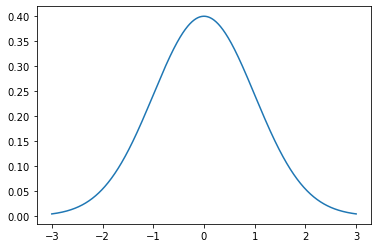

In [171]:
from scipy.stats import norm
import math

mu = 0
sigma = 1

x = np.linspace(mu-3*sigma,mu+3*sigma,1000)
y = norm.pdf(x,mu,sigma)

plt.plot(x,y)

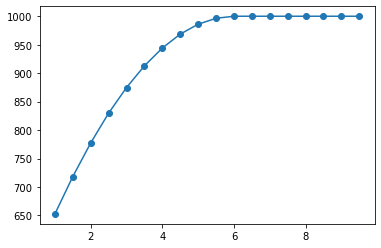

In [172]:
average_array = average_array_maker(scale_map,x)
plt.plot(scale_map,average_array)
plt.scatter(scale_map,average_array)

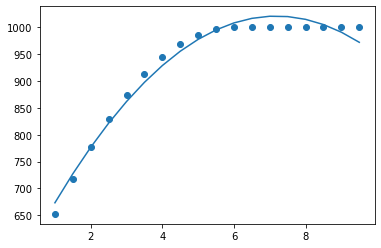

In [173]:
x_values = scale_map
y_values = list(average_array)

model = np.poly1d(np.polyfit(x_values,y_values,2))
# polyline = np.linspace(1,8,20)
plt.scatter(x_values,y_values)
plt.plot(scale_map,model(x_values))
plt.show()

/var/folders/qr/fds_zg7j76g51mq0zmqdqfnc0000gn/T/ipykernel_31368/3439120659.py:115: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'r_squared': 0.9999921654235026}

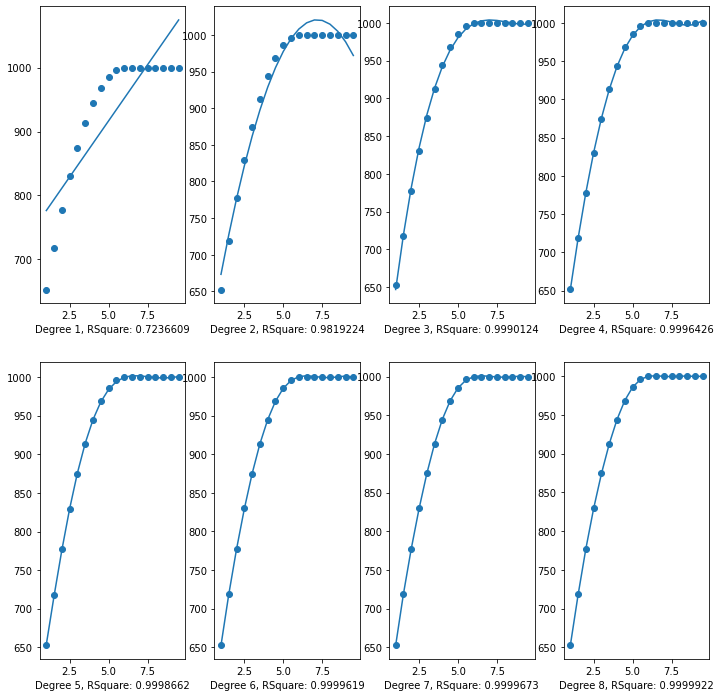

In [174]:
polyfit(x_values,y_values,degrees)

## 5 D Data

In [112]:
x = np.random.standard_normal(100)
y = np.random.standard_normal(100)
z = np.random.standard_normal(100)
a = np.random.standard_normal(100)
b = np.random.standard_normal(100)

In [113]:
five_d = np.array([x,y,z,a,b]).T

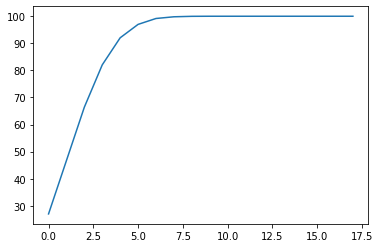

In [146]:
average_array = average_array_maker(scale_map,five_d,dimension_x=5)
plt.plot(average_array,)

/var/folders/qr/fds_zg7j76g51mq0zmqdqfnc0000gn/T/ipykernel_31368/3439120659.py:115: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'r_squared': 0.9999832711287586}

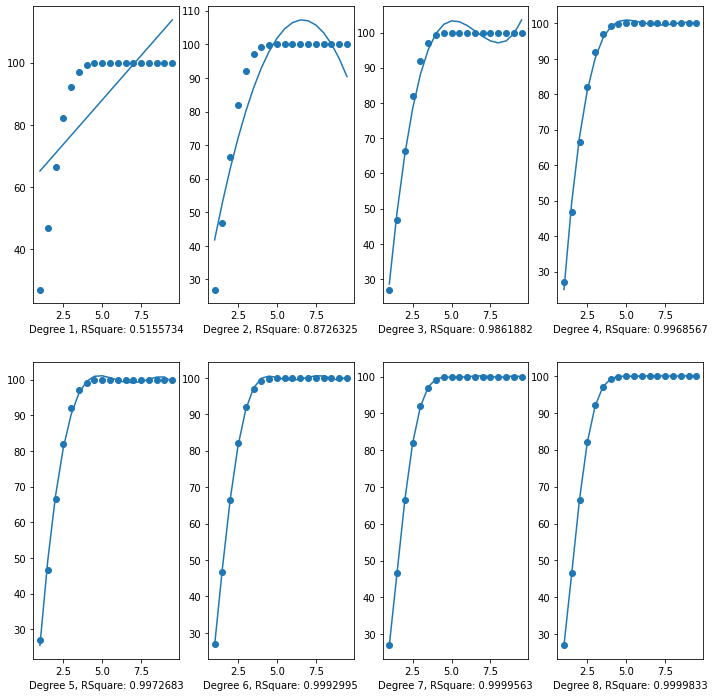

In [147]:
polyfit(scale_map,average_array,degrees)

## Uniform distribution

In [114]:
s = np.random.uniform(-2,2,100)
np.histogram(s,bins=4,)

scale_map_1d_uniform = list(np.linspace(0.1,2,10))



(array([28, 23, 26, 23]),
 array([-1.99666527, -1.00967644, -0.02268761,  0.96430122,  1.95129006]))

In [226]:
scale_map_1d_uniform = list(np.linspace(0.1,2,10))

average_array = average_array_maker(scale_map,s,dimension_x=1)

# polyfit(scale_map,average_array,degrees)

# average_array


## 2d Uniform distribution

In [182]:
# n = 100
# xy_min = [0, 0,0,0,0]
# xy_max = [100, 200,300,300,400]
# data = np.random.uniform(low=xy_min, high=xy_max, size=(n,5))


n = 1000
xy_min = [0, 0]
xy_max = [10, 10]
data = np.random.uniform(low=xy_min, high=xy_max, size=(n,2))

average_array = average_array_maker(scale_map,data,dimension_x=2)


In [ ]:
polyfit(scale_map,average_array,degrees)

/var/folders/qr/fds_zg7j76g51mq0zmqdqfnc0000gn/T/ipykernel_35346/1309102978.py:132: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'r_squared': 0.9990960205880647}

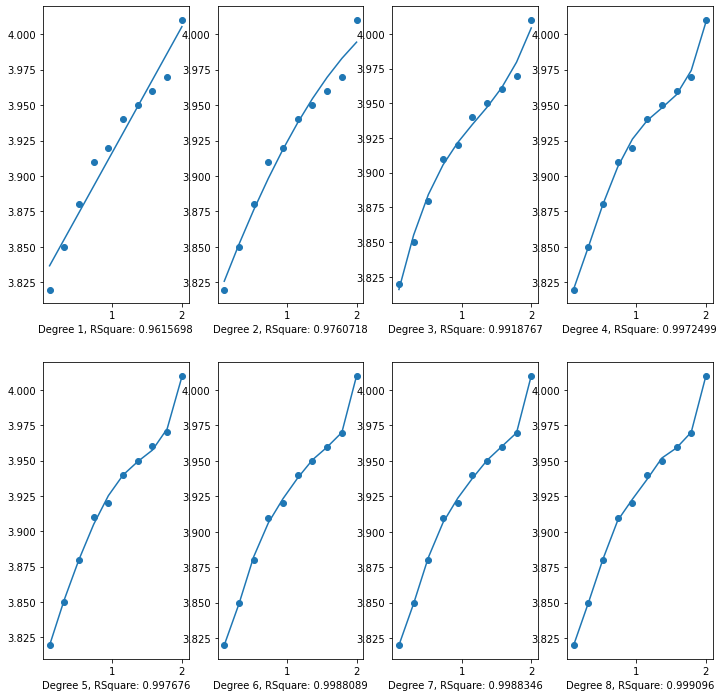

## 1d Uniform 

In [211]:
s = np.random.uniform(-2,2,100)
scale_map_1d_uniform = list(np.linspace(0.1,1,20))

count_list = updated_count_maker(scale_map_1d_uniform,s,dimension_x=1)

/var/folders/qr/fds_zg7j76g51mq0zmqdqfnc0000gn/T/ipykernel_35346/2721081903.py:157: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'r_squared': 0.9946199817401883}

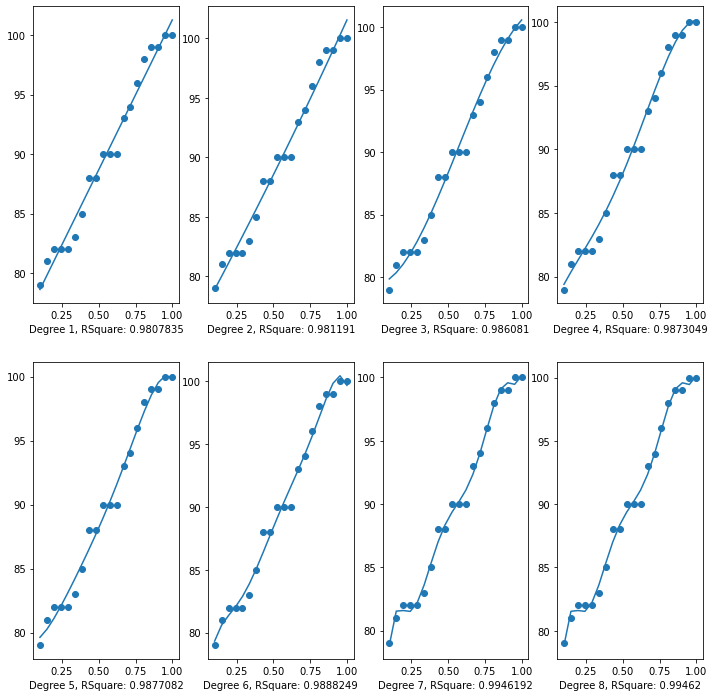

In [212]:

polyfit(scale_map_1d_uniform,count_list[5],degrees)


/var/folders/qr/fds_zg7j76g51mq0zmqdqfnc0000gn/T/ipykernel_35346/2721081903.py:157: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'r_squared': 0.9960993627907759}

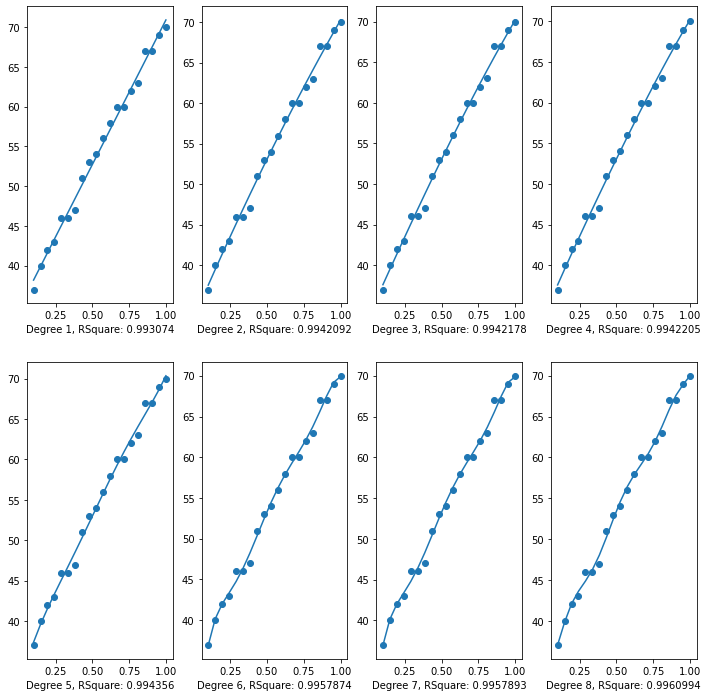

In [197]:
polyfit(scale_map_1d_uniform,count_list[45],degrees)


/var/folders/qr/fds_zg7j76g51mq0zmqdqfnc0000gn/T/ipykernel_35346/2721081903.py:157: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'r_squared': 0.9693003651306407}

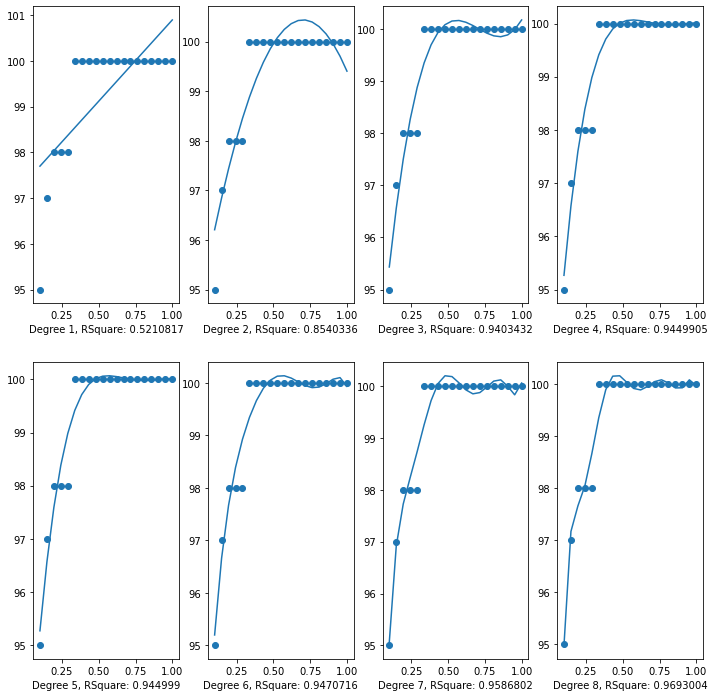

In [198]:
polyfit(scale_map_1d_uniform,count_list[85],degrees)


## 2d uniform

In [216]:
n = 4000
xy_min = [0, 0]
xy_max = [10, 10]
data = np.random.uniform(low=xy_min, high=xy_max, size=(n,2))

scale_map_2d_uniform = list(np.linspace(0.1,5,20))

average_array = updated_count_maker(scale_map_2d_uniform,data,dimension_x=2)


/var/folders/qr/fds_zg7j76g51mq0zmqdqfnc0000gn/T/ipykernel_35346/2721081903.py:157: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'r_squared': 0.9996297576717256}

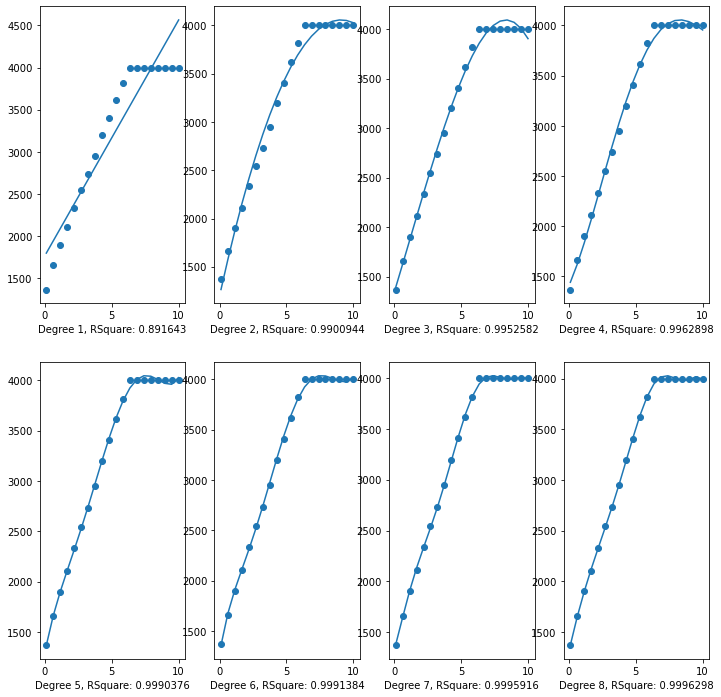

In [222]:
polyfit(scale_map_2d_uniform,average_array[10],degrees)


/var/folders/qr/fds_zg7j76g51mq0zmqdqfnc0000gn/T/ipykernel_35346/2721081903.py:157: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'r_squared': 0.9998519548837579}

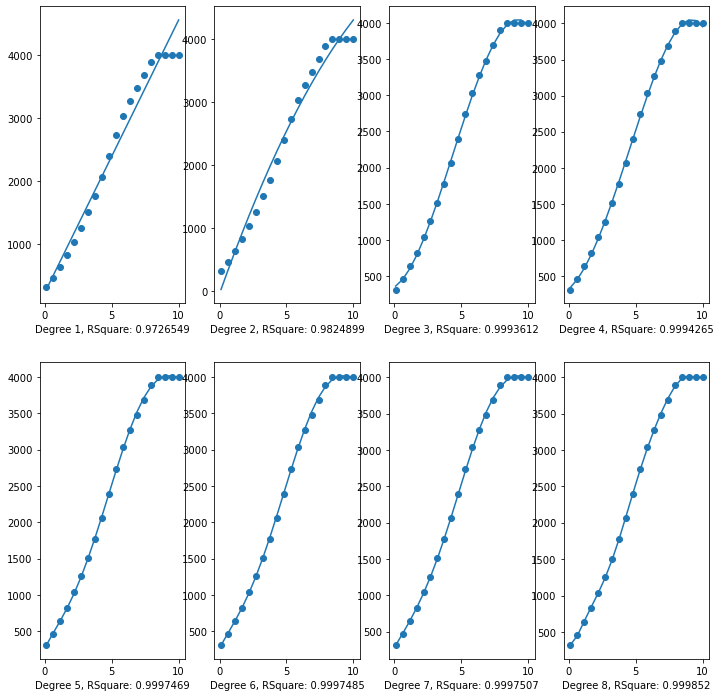

In [219]:
polyfit(scale_map_2d_uniform,average_array[2000],degrees)


/var/folders/qr/fds_zg7j76g51mq0zmqdqfnc0000gn/T/ipykernel_35346/2721081903.py:157: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'r_squared': 0.9985785431594661}

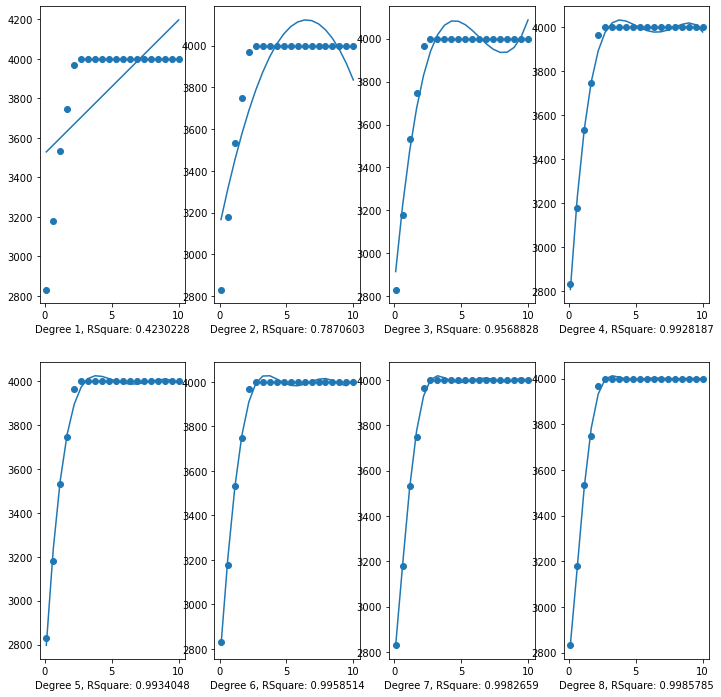

In [221]:
polyfit(scale_map_2d_uniform,average_array[3500],degrees)


## 1d normal

In [257]:
mu, sigma = 0, 2 # mean and standard deviation
s = np.random.normal(mu, sigma, 3000)


In [359]:
scale_map_1d_norm = list(np.linspace(0.01,0.1,40))
count_list = updated_count_maker(scale_map_1d_norm,s,dimension_x=1)



ValueError: Must pass 2-d input. shape=(2, 3000, 40)

In [ ]:
polyfit(scale_map_1d_norm,count_list[40],degrees)

In [ ]:
polyfit(scale_map_1d_norm,count_list[1500],degrees)

In [ ]:
polyfit(scale_map_1d_norm,count_list[2900],degrees)

## 2d normal

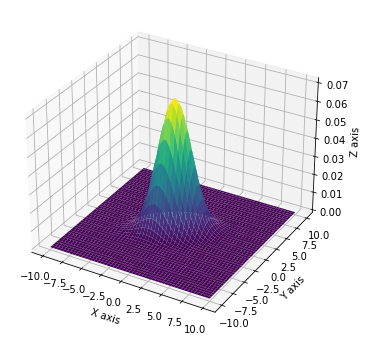

In [347]:
from scipy import stats


mu = [0,0]
covar = [[3,1],[1,2]]
data_points = 3000
seed = 100
# s = np.random.multivariate_normal(mu, covar, data_points)
random_points = stats.multivariate_normal(mu,covar,data_points,seed=seed)

def plot_2d_norm(data):
    x1 = np.linspace(-10,10,200)
    x2 = np.linspace(-10,10,200)    
    X1,X2 = np.meshgrid(x1,x2)
    pos = np.empty(X1.shape + (2,))
    pos[:, :, 0] = X1
    pos[:, :, 1] = X2
    
    fig1 = plt.figure(figsize=(6,6))
#     ax = fig1.gca(projection='3d')
    ax = plt.axes(projection = '3d')
    ax.plot_surface(X1,X2,data.pdf(pos),cmap='viridis',linewidth=0)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    plt.show()
    
plot_2d_norm(random_points)



    

In [352]:
scale_map_2d_norm = list(np.linspace(0.001,0.1,40))
s = random_points.rvs(size=data_points)

count_list = updated_count_maker(scale_map_2d_norm,s,dimension_x=2)

In [357]:
# scale_map_2d_norm

In [ ]:
stats.describe(s[:,1])

/var/folders/qr/fds_zg7j76g51mq0zmqdqfnc0000gn/T/ipykernel_35346/2721081903.py:157: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'r_squared': 0.9777264011687647}

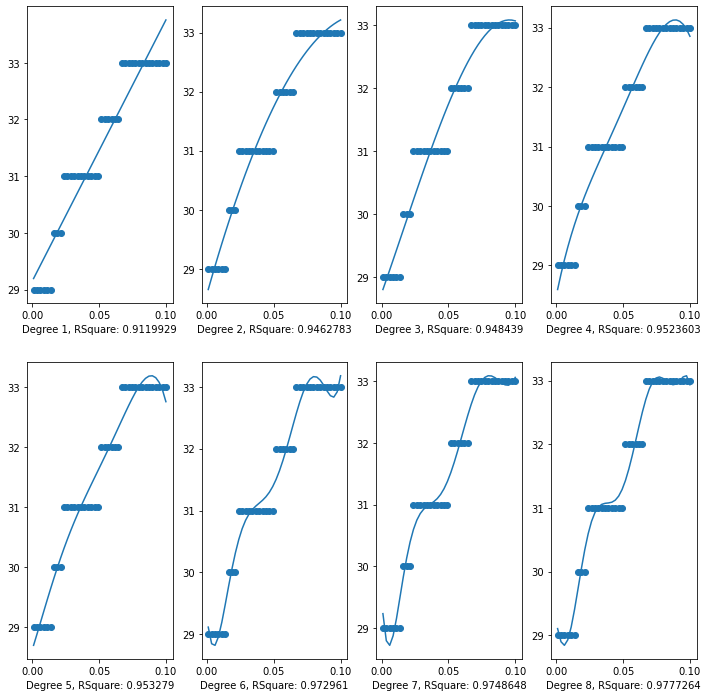

In [353]:
polyfit(scale_map_2d_norm,count_list[50],degrees)

/var/folders/qr/fds_zg7j76g51mq0zmqdqfnc0000gn/T/ipykernel_35346/2721081903.py:157: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'r_squared': 0.998377244771927}

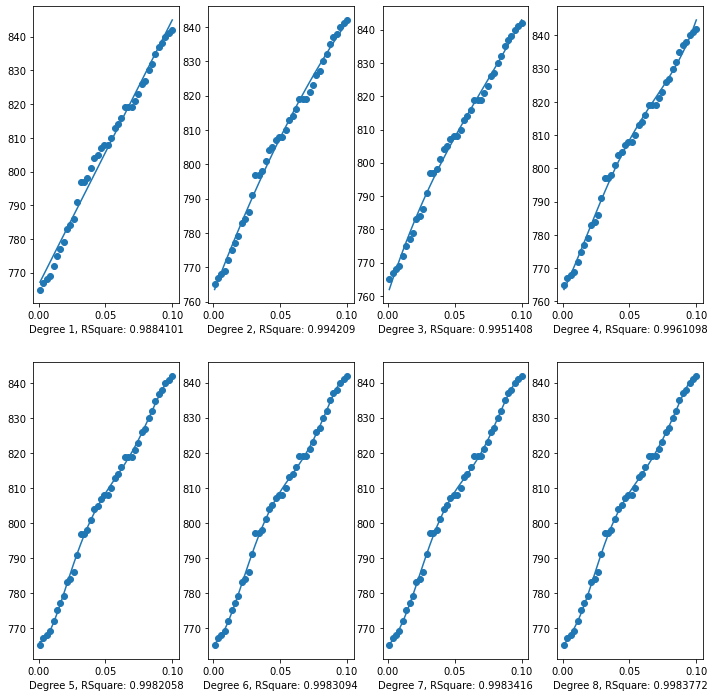

In [354]:
polyfit(scale_map_2d_norm,count_list[1500],degrees)

/var/folders/qr/fds_zg7j76g51mq0zmqdqfnc0000gn/T/ipykernel_35346/2721081903.py:157: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'r_squared': 0.9968365857754029}

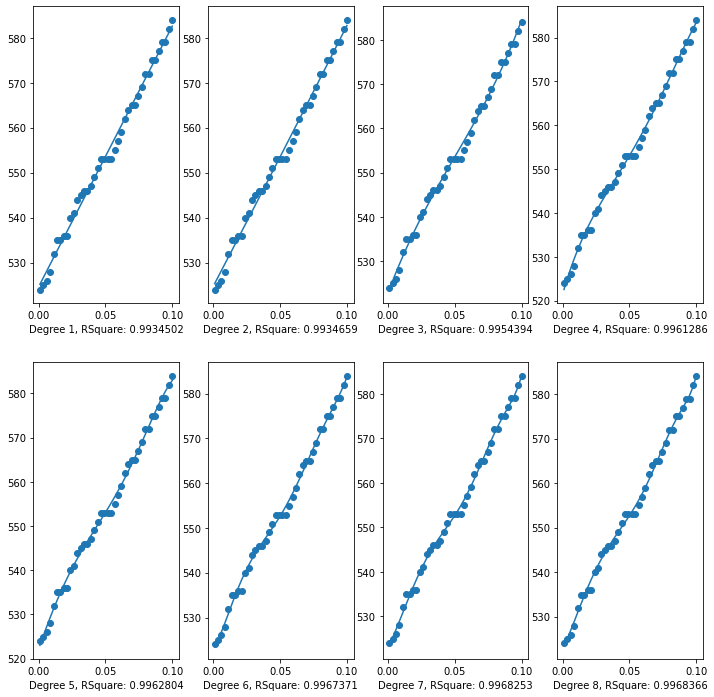

In [355]:
polyfit(scale_map_2d_norm,count_list[2900],degrees)